# Factors that impact the loan approval for an applicant 

## Investigation Overview

In this investigation, I wanted to look at the factors or features that could help the loan applicant to get the approval status. The main focus was on the some of the variables like 
'Term' , 'LoanStatus', 'BorrowerRate' ,  'ProsperScore', 'EmploymentStatus', 'Occupation',  'BorrowerHomeowner', 
'StatedMonthlyIncome', 'Recommendations', 'LoanOriginalAmount' , 'IncomeRange'.


## Dataset Overview

This ProsperLoan data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

For simplicity of the visualization I have looked at only few variables as the project objective itself says to focus on only few variables.

## Summary and Insights


* LoanStatus of all Borrowers are with current and completed state

* EmploymentStatus of all Borrowers are with Employed State

* Majority of the loan applicants are from 50K to 75K range with emloyeed status

* The distribution of monthly income of applicants is a right skewed because there will be few applicants with high salary. 

* Applicants with incomerange of 50K to 75K range have their prosper rating falling under AA, A, B and C 
* LoanStatus with current and completed have own homes when they applied for loans

* The monthly income of borrowers are having higher values for employed, other and full time employment status with the prosper rating of AA, A and B

* We observe that without homeowner tend to have a higher interest rate, and thus lower rating.However homeowner tends to have lower interest rate and higher rating. So we can safely say that homeowner is safest bet when gving a loan. We can also clearly observe that HR prosper rating applicants have higher interest rates





### Load packages

In [ ]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import xticks

%matplotlib inline

In [ ]:
# Becaues I'm using google colab i'm goona using this extra lines of code
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Read the data

In [ ]:
mydata = pd.read_csv('/content/gdrive/MyDrive/Data Folder /prosperLoanData.csv')
mydata.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,...,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,...,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,...,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,

In [ ]:
# Due to many variables in this dataset, I only use few variables. Those are:  
mydata_columns = ['Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors',
        'BorrowerState']

In [ ]:
loan_data = mydata[mydata_columns]

* 1- There are no  missing values.
* 2- I wont check all the coloumn, only the few i will list below

In [ ]:
loan_data = loan_data.dropna()

In [ ]:
#convert term into category
loan_data['Term'] = loan_data['Term'].astype('category')

In [ ]:
loan_data.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_Alpha', 
                        'ProsperRating (numeric)': 'ProsperRating_Numeric',
                        'ListingCategory (numeric)' : 'ListingCategory_Numeric'
                       }, inplace=True)

* Now, I have my finall dataset with no null





#### Identify the type of variables

In [ ]:
#Numeric attributes
num_loan_data = loan_data.loc[:, (loan_data.dtypes == np.float64) | (loan_data.dtypes == np.int64)]
num_loan_data.columns

Index(['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
       'ProsperRating_Numeric', 'ProsperScore', 'ListingCategory_Numeric',
       'EmploymentStatusDuration', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
       'PercentFunded', 'Investors'],
      dtype='object')

In [ ]:
#Categorical attributes
cat_loan_data = loan_data.loc[:, (loan_data.dtypes == 'object') | (loan_data.dtypes == 'category')]
cat_loan_data.columns


Index(['Term', 'LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus',
       'Occupation', 'IncomeRange', 'BorrowerState'],
      dtype='object')

<Figure size 720x360 with 0 Axes>

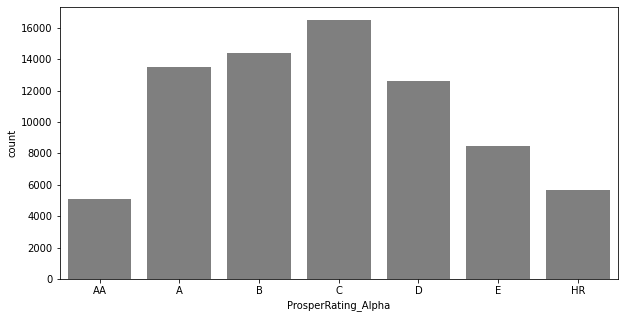

In [ ]:
# From above it seems the order has to be maintained becuase this is an ordinal variable
plt.figure(figsize = [10, 5]) 
ProsperRating_Alpha_classes = ['AA','A', 'B', 'C', 'D', 'E', 'HR']
IncomeRange_classes = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRating_Alpha_classes)
    loan_data['ProsperRating_Alpha'] = loan_data['ProsperRating_Alpha'].astype(vclasses)
    vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRange_classes)
    loan_data['IncomeRange'] = loan_data['IncomeRange'].astype(vclasses_1)
else: # compatibility for v.20
    loan_data['ProsperRating_Alpha'] = loan_data['ProsperRating_Alpha'].astype('category', ordered = True,
                                                     categories = ProsperRating_Alpha_classes)
    loan_data['IncomeRange'] = loan_data['IncomeRange'].astype('category', ordered = True,
                                                     categories = IncomeRange_classes)

plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[7]
sb.countplot(data = loan_data, x = 'ProsperRating_Alpha', color = base_color);

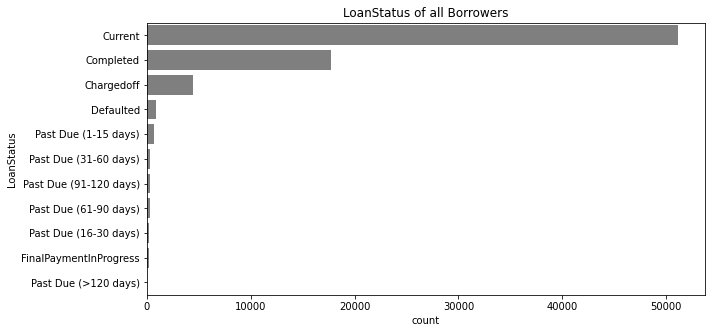

In [ ]:
#'LoanStatus'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[7]
plt.title("LoanStatus of all Borrowers")
sb.countplot(data = loan_data, y = 'LoanStatus', color = base_color,
             order = loan_data['LoanStatus'].value_counts().index);

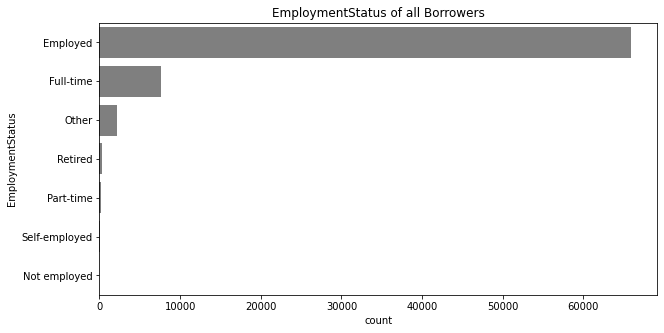

In [ ]:
# 'EmploymentStatus'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[7]
plt.title("EmploymentStatus of all Borrowers")
sb.countplot(data = loan_data, y = 'EmploymentStatus', color = base_color,
             order = loan_data['EmploymentStatus'].value_counts().index);

In [ ]:
loan_data_1 = loan_data[loan_data['IncomeRange'] != 'Not employed']

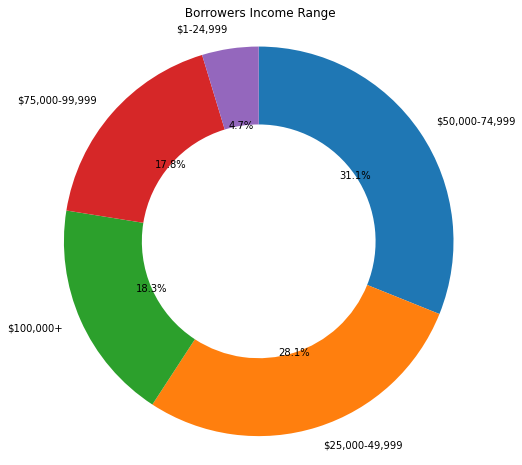

In [ ]:
plt.figure(figsize = [15, 8])
sorted_counts = loan_data_1['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4}, autopct   = '%.1f%%');
plt.title(" Borrowers Income Range")
plt.axis('square');

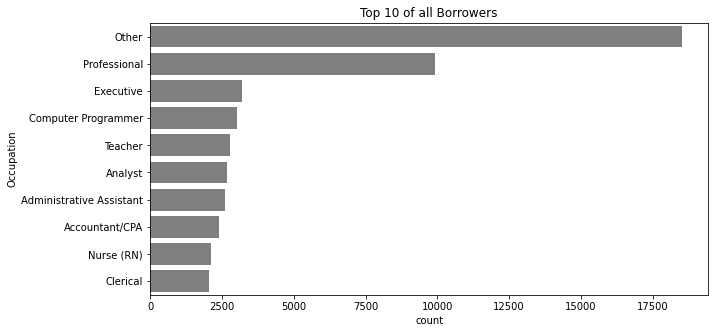

In [ ]:
#'Occupation'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[7]
sb.countplot(data = loan_data, y = 'Occupation', color = base_color,
             order = loan_data['Occupation'].value_counts().head(10).index );
plt.title("Top 10 of all Borrowers");

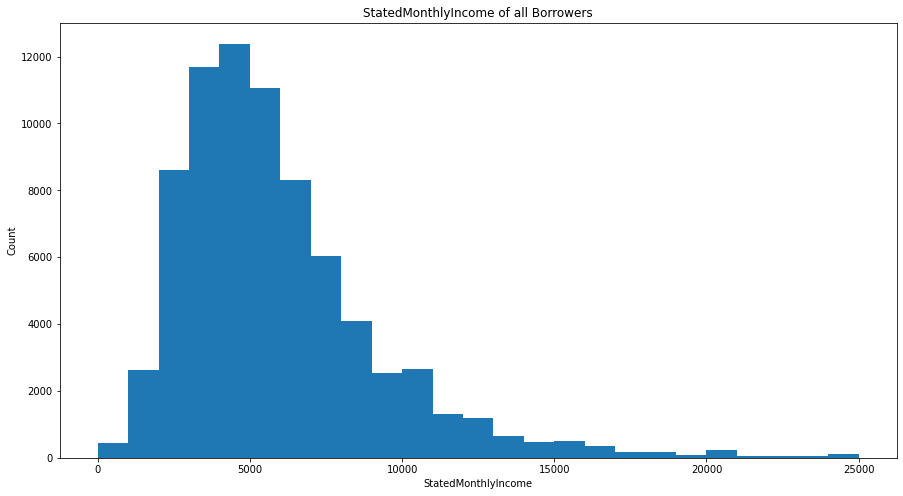

In [ ]:
plt.figure(figsize = [15, 8])
loan_data_sub = loan_data[loan_data['StatedMonthlyIncome'] <= 25000]
bin_edges = np.arange(0, loan_data_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data = loan_data, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

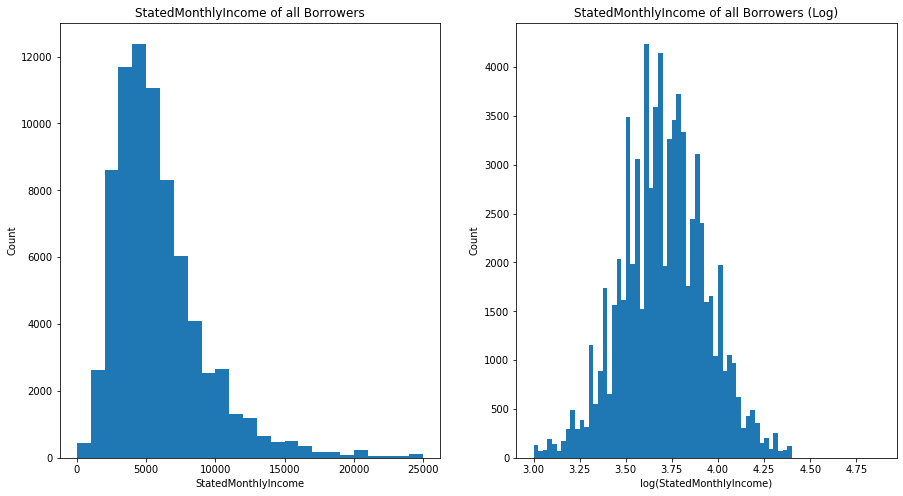

In [ ]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_data_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data =loan_data_sub, x = 'StatedMonthlyIncome', bins = bin_edges)
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_data_sub['StatedMonthlyIncome']) # direct data transform
log_bin_edges = np.arange(3, log_data.max()+0.5, 0.025)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(StatedMonthlyIncome)');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers (Log)");

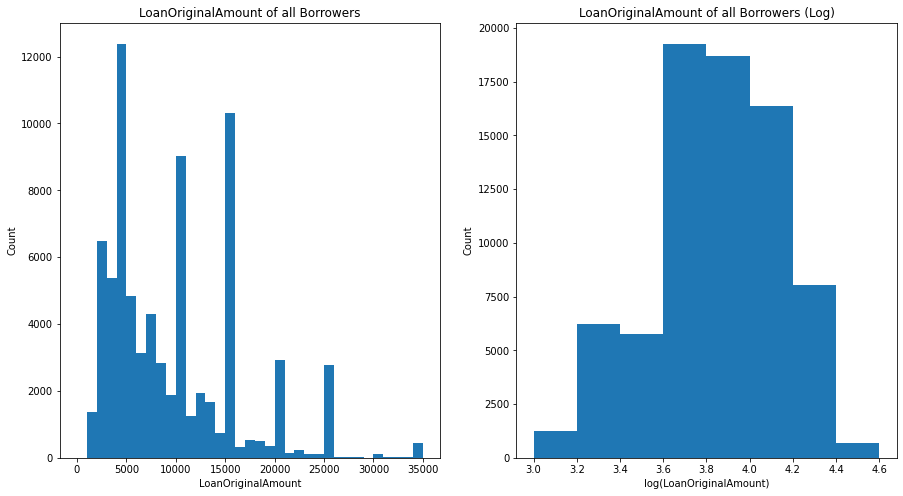

In [ ]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_data['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data =loan_data, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_data['LoanOriginalAmount']) # direct data transform
log_bin_edges = np.arange(3.0, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(LoanOriginalAmount)');
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers (Log)");

loan_data['LoanOriginalAmount_log'] = np.log10(loan_data['LoanOriginalAmount'])

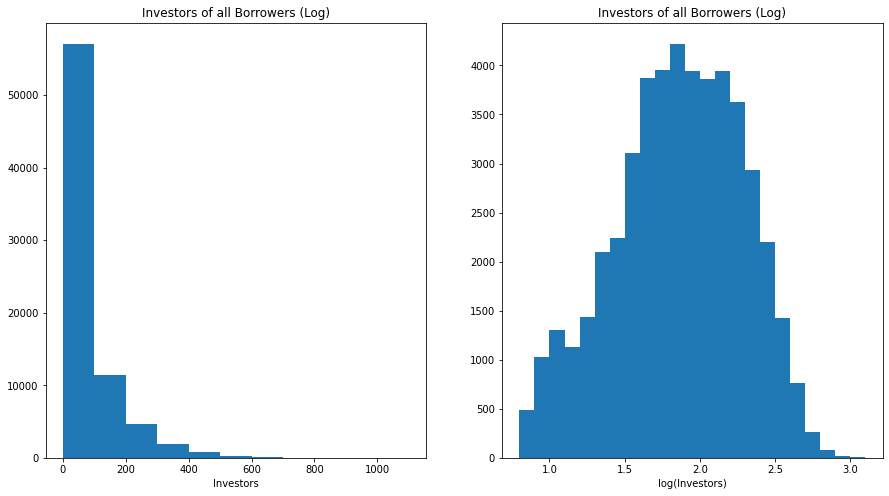

In [ ]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_data['Investors'].max()+10, 100)
plt.hist(data =loan_data, x = 'Investors', bins = bin_edges)
plt.xlabel('Investors')
plt.title("Investors of all Borrowers (Log)");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_data['Investors']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Investors)')
plt.title("Investors of all Borrowers (Log)");

loan_data['Investors_log'] = np.log10(loan_data['Investors'])

### Insights with Numerical variables analysis

* **BorrowerRate :**	*The Borrower's interest rate for this loan.* The borrowers rate follow an approximately unimodal distribution, with the peak around 0.16. There seems to be a spike that occurs around 0.32.
  
* **StatedMonthlyIncome :**	*The monthly income the borrower stated at the time the listing was created.*
 Monthly Income will definitely be right skewed since very few people will be having a higher salary. So I cut the outliers   and made the data to look at log 10 scales. Majority of the borrowers are having a salary with less than 10000 USD and the peak is observed at 5000 USD

* **LoanOriginalAmount:** The origination amount of the loan.Now this is interesting. Here we see that the distribution is a right skewed with multiple peaks observed at 4000 USD, 10000 USD and 15000 USD.

* **Investors:** Majority of the investors are between 0 and 100

### Bivariate Exploration

#### Relationship between two numeric variables

In [ ]:
numeric_vars = ['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
                'ProsperRating_Numeric', 'ProsperScore', 
                'ListingCategory_Numeric','EmploymentStatusDuration', 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount','PercentFunded', 'Investors', 'LoanOriginalAmount_log',
                 'Investors_log']

numeric_vars_1 = ['BorrowerRate',
                 'ProsperScore',                 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'LoanOriginalAmount', 'Investors' ,'LoanOriginalAmount_log',
                 'Investors_log']

categoric_vars = ['LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus', 'Occupation',
       'IncomeRange', 'BorrowerState', 'Term', 'IsBorrowerHomeowner']

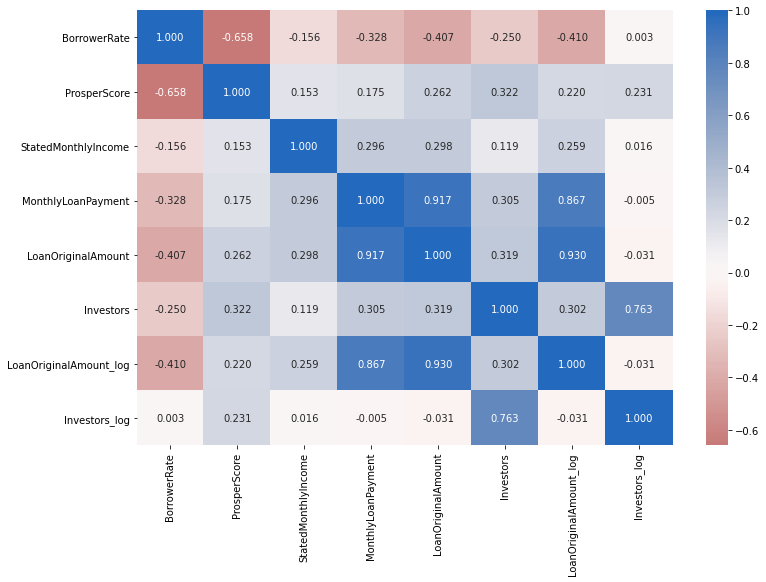

In [ ]:
# correlation plot
plt.figure(figsize = [12, 8])
sb.heatmap(loan_data[numeric_vars_1].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### Relationship between  numeric & categorical variables

Text(0.5, 1.0, 'Income Range vs Loan Amount')

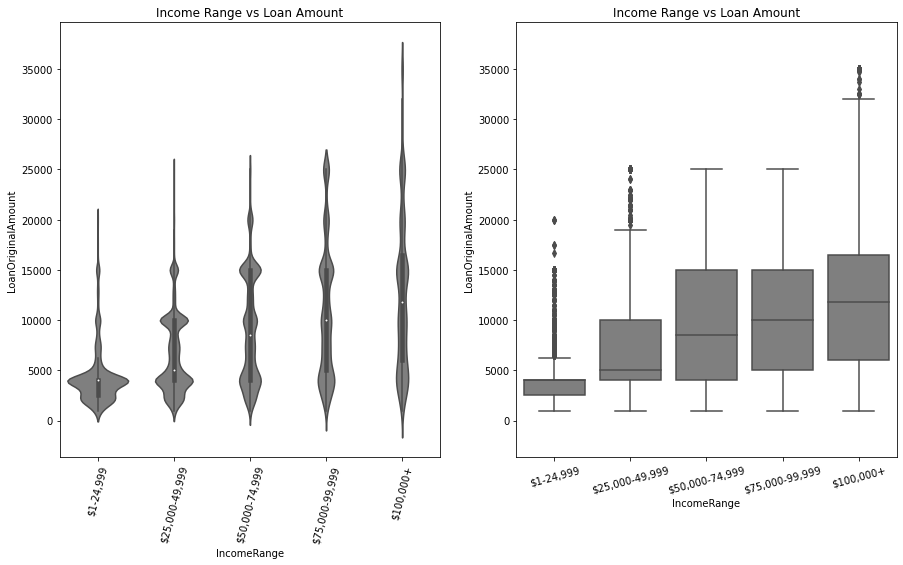

In [ ]:
loan_data_sub = loan_data[(loan_data['StatedMonthlyIncome'] <= 10000) ]
loan_data_sub = loan_data_sub[loan_data_sub['IncomeRange'] != 'Not employed']


plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[7]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = loan_data_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 75);
plt.title('Income Range vs Loan Amount')

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = loan_data_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

#### Categorical variables analysis

### Homeowner status vs Loanstatus ( Applicants Count) 

* We can clearly observe from below that , applicants who have their ownhomes have higher count on "Completed" and "Current" status. This clearly shows that to get the Loanstatus or loan approval, Homeowner status is one of the important factor.

Text(0.5, 1.0, 'Count of Applicants w.r.t LoanStatus and HomeownerStatus')

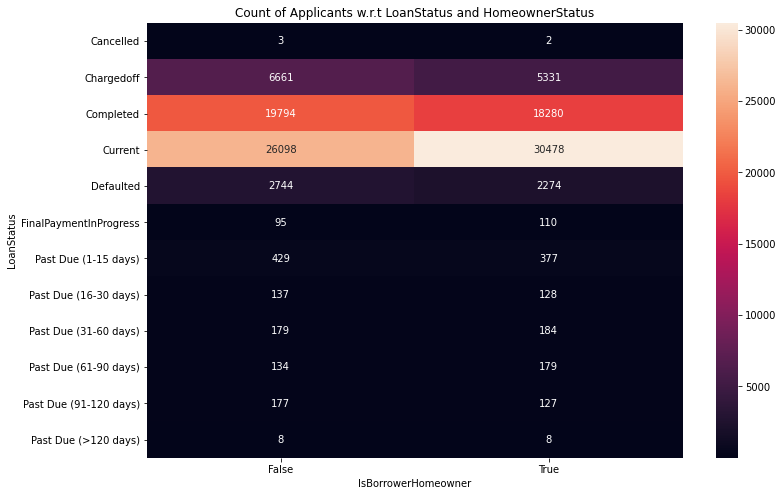

In [ ]:
plt.figure(figsize = [12, 8])
ct_counts = mydata.groupby(['IsBorrowerHomeowner', 'LoanStatus']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'IsBorrowerHomeowner', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd');
plt.title('Count of Applicants w.r.t LoanStatus and HomeownerStatus')

### Prosper rating dependency on Employment status and Income Range

* For all the high rating categries like AA, A, B, C , it is quite evident from the graphs that the approval of loans are majorly depend on the applicants income range and Employment status.

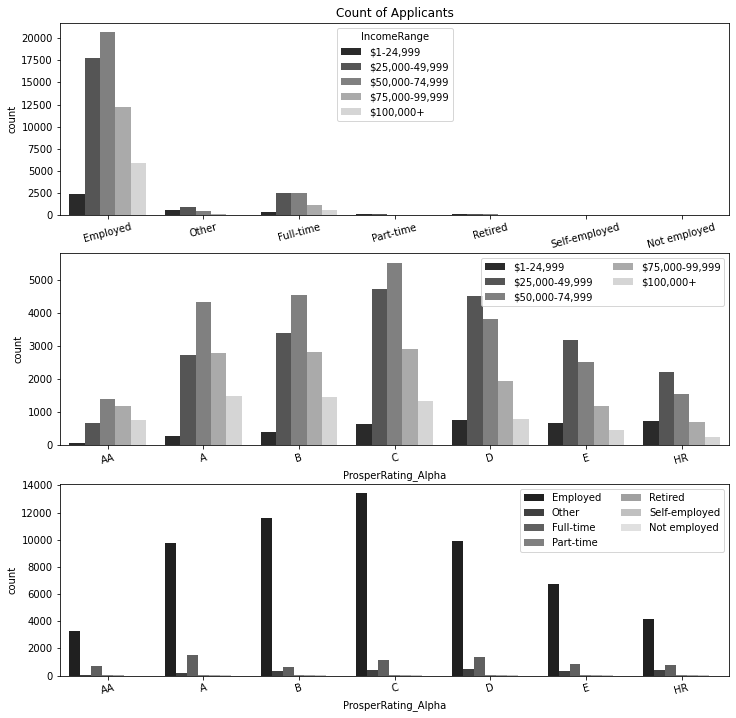

In [ ]:
# since there's only three subplots to create, using the full data should be fine.
categoric_vars = ['EmploymentStatus', 'ProsperRating_Alpha', 'IncomeRange']

plt.figure(figsize = [12, 12])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = loan_data_sub, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'gist_gray')
plt.xticks(rotation = 15)
plt.title('Count of Applicants')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_data_sub, x = 'ProsperRating_Alpha', hue = 'IncomeRange', palette = 'gist_gray')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)


# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_data_sub, x = 'ProsperRating_Alpha', hue = 'EmploymentStatus', palette = 'gist_gray')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)


plt.show()

#### Insights about the entire Bivariate analysis

* Loan original amount and monthly loan payment is highly correlated and it is expected  and borrowers interest rate and proper score are highly correlated(-vely).

* Majority of the borrowers with highest loan amount are taken by Employed, this is followed by others and fulltime employees

* The range of the salaries stated is higher for employed borrowers.

* LoanOriginalAmount is highest for A and B Prosper ratings, when compared with income range - 
  it is following a normal or expected trend that more salary borrowers are having higher loanoriginalamount 

* LoanStatus with current and completed have own homes when they applied for loans

* Majority of the loan applicants are from 50K to 75K range with emloyeed status

* Applicants with incomerange of 50K to 75K range have their prosper rating falling under AA, A, B and C 

### Multivariate Exploration

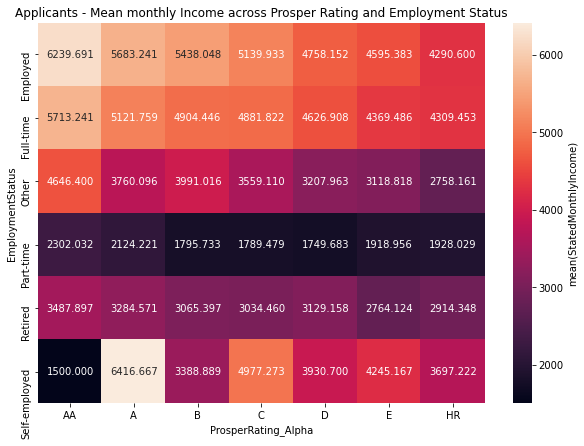

In [ ]:
# To identify how the applicants mean monthly income is spread across
plt.figure(figsize = [10, 7])
loan_data_sub = loan_data_sub[loan_data_sub['EmploymentStatus'] != 'Not employed']

cat_means = loan_data_sub.groupby(['ProsperRating_Alpha', 'EmploymentStatus']).mean()['StatedMonthlyIncome']
cat_means = cat_means.reset_index(name = 'StatedMonthlyIncome_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'ProsperRating_Alpha',
                            values = 'StatedMonthlyIncome_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(StatedMonthlyIncome)'});
plt.title('Applicants - Mean monthly Income across Prosper Rating and Employment Status');

### Applicants rating with monthly income and Employment Status

* High rating is given to applicants with employee status having employed and full time and these appicants have higher monthly salary


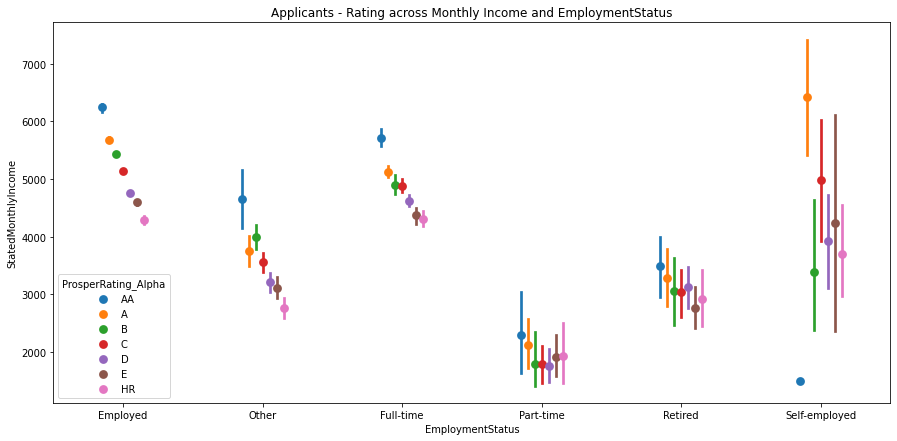

In [ ]:
# To identify how the applicants rating is affected by Employment status and Monthly income
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_data_sub, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating_Alpha',
                  dodge = 0.3, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');

### Applicants rating with borrwers interest rate and homeowner status

* We observe that without homeowner tend to have a higher interest rate, and thus lower rating.However homeowner tends to have lower interest rate and higher rating. So we can safely say that homeowner is safest bet when gving a loan. We can also clearly observe that HR prosper rating applicants have higher interest rates


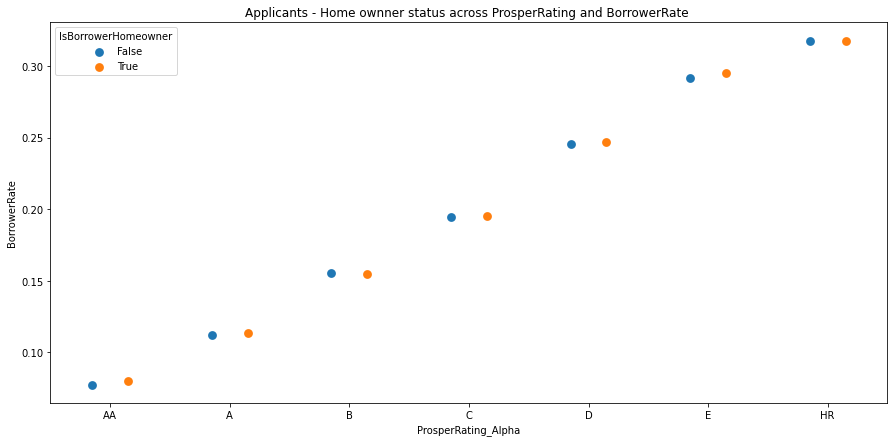

In [ ]:
# To identify how the applicants interest rate is affected by ratings
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_data_sub, x = 'ProsperRating_Alpha', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "");
plt.title('Applicants - Home ownner status across ProsperRating and BorrowerRate ');

* **To conclude this analysis , I say that the loan approval status is heavily dependent on the applicant's 
  information on IncomeRange, Homeownerstatus and employment status.**


#### Insights from the multivariate exploration data

* For Applicants with prosper ratings from AA to D have the higher loan amount with increased salary

* Employed and full time employees have their mean salaries in higher range

* Majority of the borrowers are falling under prosper rating of B , irrespective of the income range

* The monthly income of borrowers are having higher values for employed, other and full time employment status with the prosper rating  of    AA, A and B

* We observe that without homeowner tend to have a higher interest rate, and thus lower rating.However  homeowner tends to have lower interest rate and higher rating.  So we can safely say that homeowner is safest bet when gving a loan. We can also clearly observe that HR prosper rating applicants have higher interest rates
